In [42]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')

from eisfit.circuits import Randles

In [43]:
# read data
data = np.genfromtxt('../data/exampleData.csv', delimiter=',')

frequencies = data[:,0]
Z = data[:,1] + 1j*data[:,2]

In [61]:
circuit = Randles(initial_guess=[.01, .005, .1, .9, .001, 200], CPE=True)
circuit = Randles(initial_guess=[.01, .005, .1, .001, 200], CPE=False)

circuit.fit(frequencies[np.imag(Z) < 0], Z[np.imag(Z) < 0])
Z_fit = circuit.predict(frequencies[np.imag(Z) < 0])

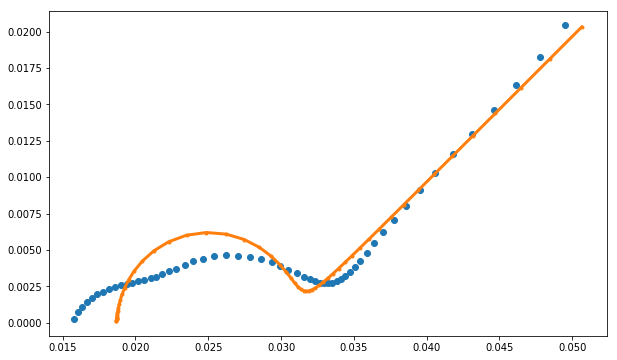

In [62]:

# plot the data and the fit
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.real(Z[np.imag(Z) < 0]), -np.imag(Z[np.imag(Z) < 0]), 'o')
ax.plot(np.real(Z_fit), -np.imag(Z_fit), '.-', lw=3)
ax.set_aspect('equal')

plt.show()

In [63]:
for a, b in zip(circuit.parameters_, circuit.conf_):
    print(b/a)

0.01879882086644213
0.03800086767315472
0.10719168191874143
467375.2858993887
934731.255902852


In [64]:
def ff(n):
    total_runs = 2**n
    output = np.ones(shape=(total_runs, n))
    
    level_repeat = 1
    range_repeat = 2**n
    for i in range(n):
        range_repeat //= 2
        lvl = []
        for j in range(2):
            lvl += [j]*level_repeat
        rng = lvl*range_repeat
        level_repeat *= 2
        output[:, i] = rng
     
    return output*2 - 1

output = ff(5)

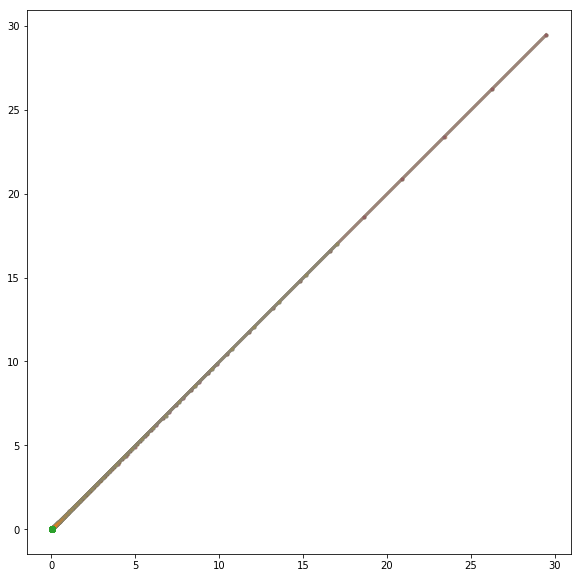

In [66]:
params = circuit.parameters_
confs = circuit.conf_

fig, ax = plt.subplots(figsize=(10,10))
for i in output:
    
    circuit.parameters_ = params + i*confs

    Z_fit = circuit.predict(frequencies[np.imag(Z) < 0])
    
    ax.plot(np.real(Z_fit), -np.imag(Z_fit), '.-', lw=3, alpha=.2)
    ax.set_aspect('equal')

ax.plot(np.real(Z[np.imag(Z) < 0]), -np.imag(Z[np.imag(Z) < 0]), 'o')

plt.show()

In [54]:
i*circuit.conf_

array([3.43748807e-04, 4.85890435e-04, 4.40042400e-01, 2.86585570e-02,
       1.93905544e-01, 3.42955588e+03])